## Basic Settings

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
data_path = '../Data/2022/heart_2022_no_nans.csv'

In [17]:
# Load the data
data = pd.read_csv(data_path)
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [18]:
# General information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [19]:
data.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


## Visualizing the Data Set

### Single Variable Visualization

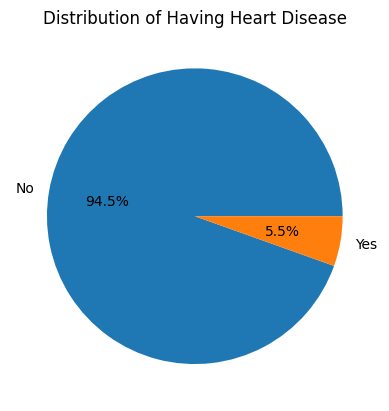

In [22]:
plt.pie(data['HadHeartAttack'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Distribution of Having Heart Disease')
plt.show()

In [23]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

/var/folders/dn/xmztcp9551z4m0kqfbr74m_m0000gn/T/ipykernel_19453/147004553.py:32: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


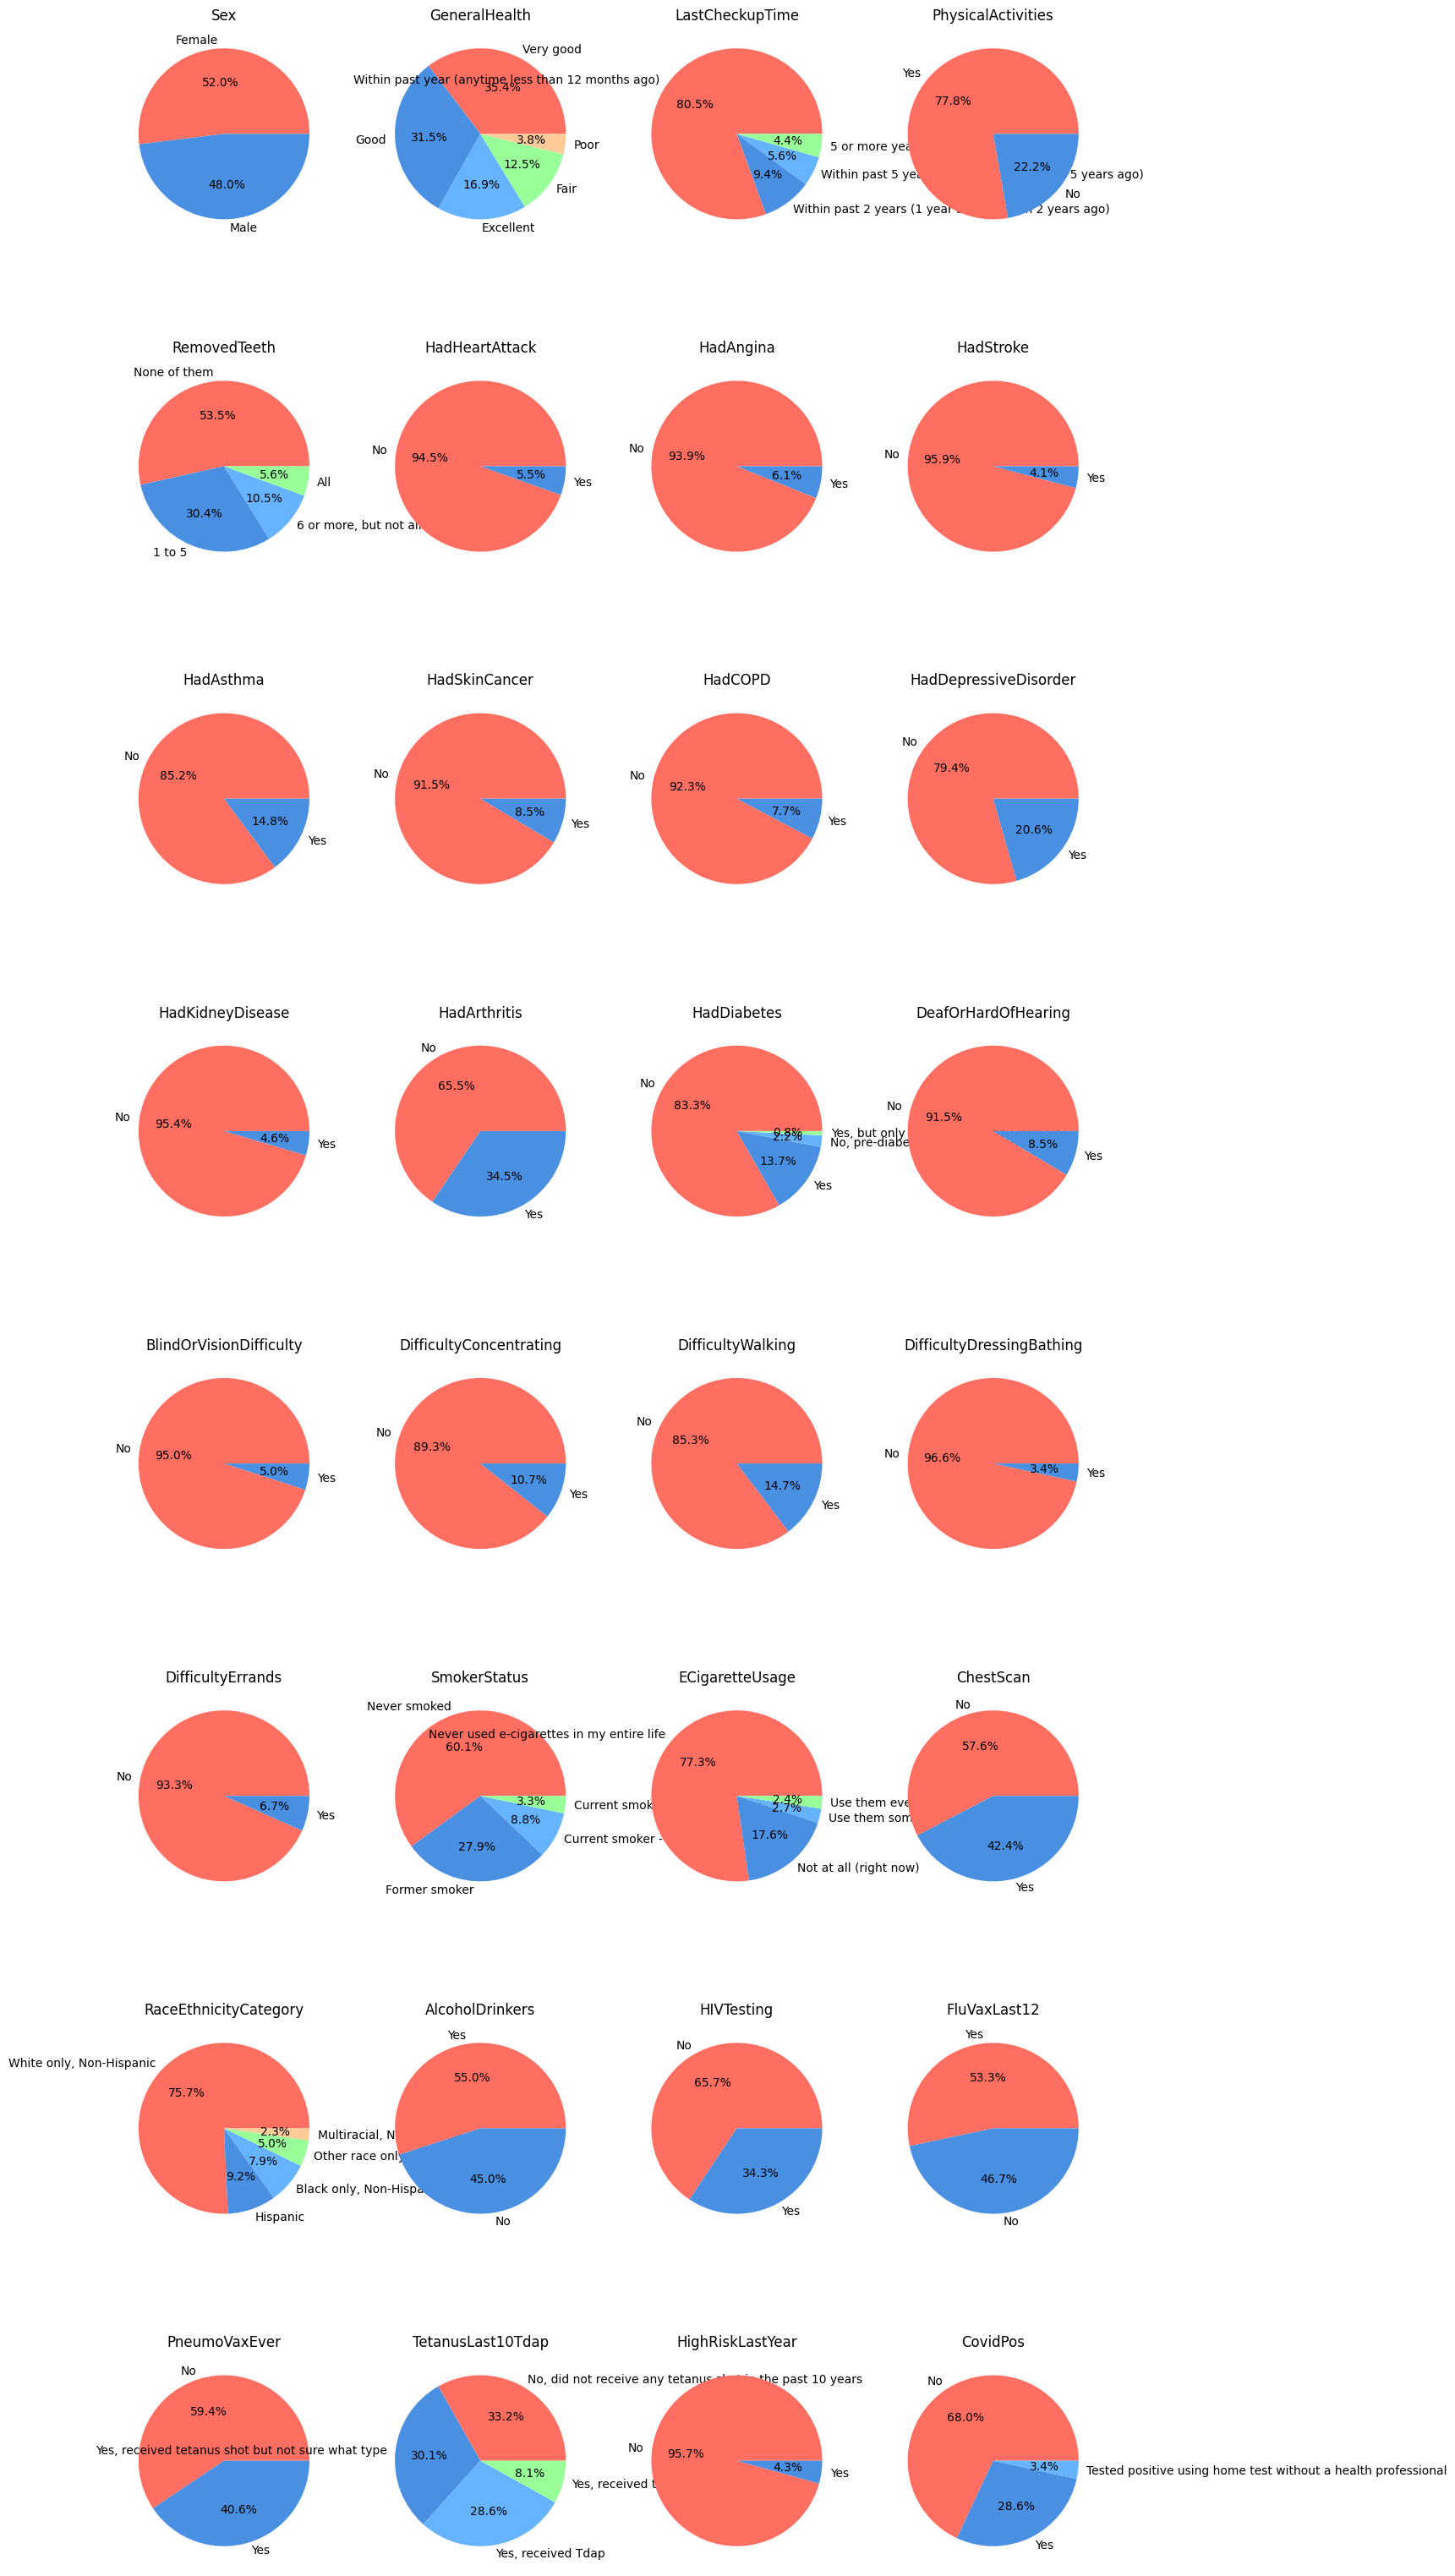

In [36]:
columns_to_plot = ['Sex', 'GeneralHealth',
       'LastCheckupTime', 'PhysicalActivities',
       'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 
       'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos']

num_plots = len(columns_to_plot)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axs.flatten()

for i, column in enumerate(columns_to_plot):
    value_counts = data[column].value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['#FF6F61', '#4A90E2', '#66b3ff', '#99ff99', '#ffcc99'])
    axes[i].set_title(column)

for i in range(num_plots, num_cols*num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

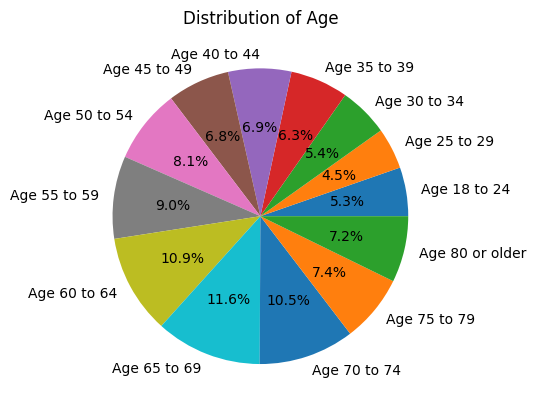

In [45]:
age_order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']

age_counts = data['AgeCategory'].value_counts().reindex(age_order)

plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Age')
plt.show()

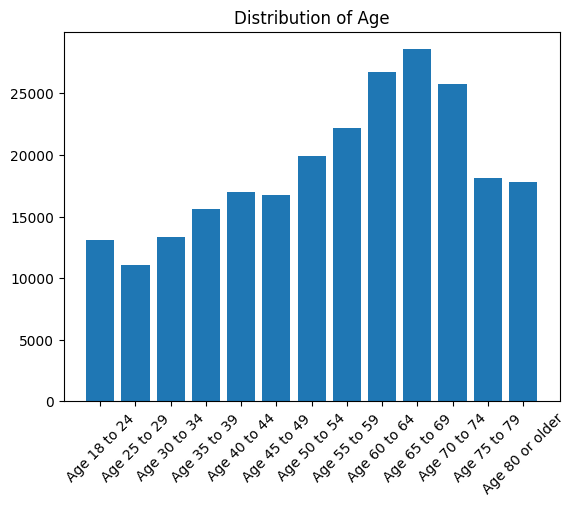

In [47]:
plt.bar(age_counts.index, age_counts)
plt.title('Distribution of Age')
plt.xticks(rotation=45)
plt.show()

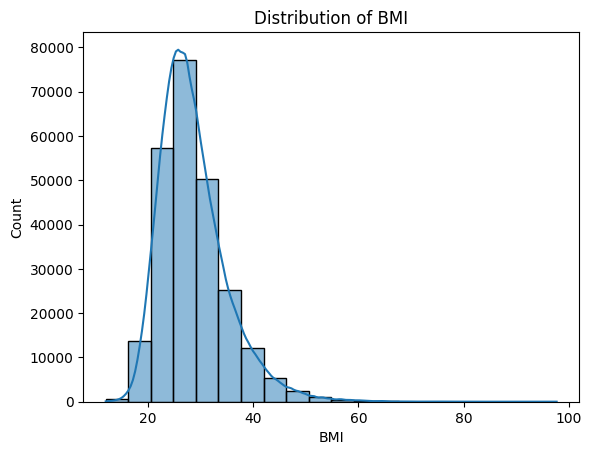

In [49]:
sns.histplot(data['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.show()

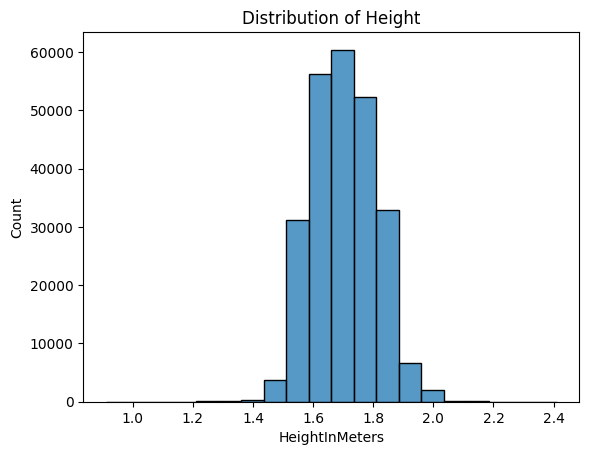

In [51]:
sns.histplot(data['HeightInMeters'], bins=20)
plt.title('Distribution of Height')
plt.show()

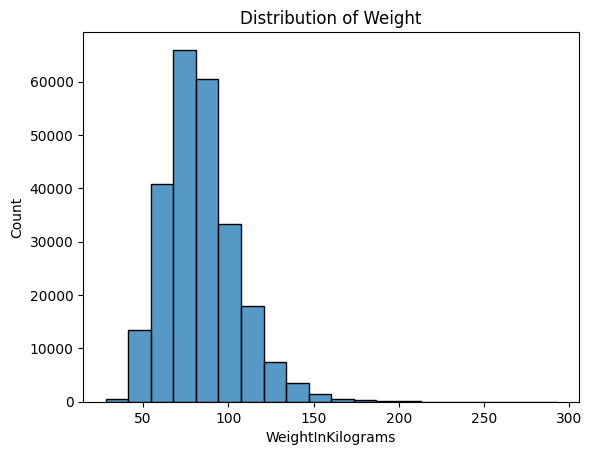

In [52]:
sns.histplot(data['WeightInKilograms'], bins=20)
plt.title('Distribution of Weight')
plt.show()

In [53]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [76]:
data['LastCheckupTime'].value_counts()

LastCheckupTime
Within past year (anytime less than 12 months ago)         198153
Within past 2 years (1 year but less than 2 years ago)      23227
Within past 5 years (2 years but less than 5 years ago)     13744
5 or more years ago                                         10898
Name: count, dtype: int64

In [77]:
heat_copy = data.copy()
def encode(data):
    # Define special mappings
    normal_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
    special_mappings = {
        'Sex' : {'Female': 0, 'Male': 1},
        'GeneralHealth' : {'Excellent': 5, 'Very good': 4, 'Good': 3, 'Fair': 2, 'Poor': 1},
        'LastCheckupTime' : {'Within past year (anytime less than 12 months ago)': 4, 'Within past 2 years (1 year but less than 2 years ago) ': 3, 'Within past 5 years (2 years but less than 5 years ago)': 2, '5 or more years ago': 1},
        'PhysicalActivities' : {'Yes': 1, 'No': 0},
        'RemovedTeeth' : {'None of them': 0, '1 to 5': 1, '6 or more, but not all': 2, 'All' : 3},
        'HadHeartAttack' : {'No': 0, 'Yes': 1},
        'HadAngina' : {'No': 0, 'Yes': 1},
        'HadStroke' : {'No': 0, 'Yes': 1},
        'HadAsthma' : {'No': 0, 'Yes': 1},
        'HadSkinCancer' : {'No': 0, 'Yes': 1},
        'HadCOPD' : {'No': 0, 'Yes': 1},
        'HadDepressiveDisorder' : {'No': 0, 'Yes': 1},
        'HadKidneyDisease' : {'No': 0, 'Yes': 1},
        'HadArthritis' : {'No': 0, 'Yes': 1},
        'HadDiabetes' : {'No': 0, 'Yes': 1},
        'DeafOrHardOfHearing' : {'No': 0, 'Yes': 1},
        'BlindOrVisionDifficulty' : {'No': 0, 'Yes': 1},
        'DifficultyConcentrating' : {'No': 0, 'Yes': 1},
        'DifficultyErrands' : {'No': 0, 'Yes': 1},
        'SmokerStatus' : {'Never smoked': 0, 'Former smoker': 1, 'Current smoker - now smokes every day': 3, 'Current smoker - now smokes some days' : 2},
        'ECigaretteUsage' : {'Never used e-cigarettes in my entire life' : 0, 'Not at all (right now)' : 1, 'Use them some days' : 2, 'Use them every day ' : 3},
        'ChestScan' : {'No': 0, 'Yes' : 1},
        'RaceEthnicityCategory' : {'White only, Non-Hispanic': 0, 'Hispanic': 1, 'Black only, Non-Hispanic': 2, 'Other race only, Non-Hispanic': 3, 'Multiracial, Non-Hispanic': 4},
        'AgeCategory' : {'Age 18 to 24': 0, 'Age 25 to 29': 1, 'Age 30 to 34': 2, 'Age 35 to 39': 3, 'Age 40 to 44': 4, 'Age 45 to 49': 5, 'Age 50 to 54': 6, 'Age 55 to 59': 7, 'Age 60 to 64': 8, 'Age 65 to 69': 9, 'Age 70 to 74': 10, 'Age 75 to 79': 11, 'Age 80 or older': 12},
        'AlcoholDrinkers' : {'No': 0, 'Yes' : 1},
        'HIVTesting' : {'No': 0, 'Yes' : 1},
        'FluVaxLast12' : {'No': 0, 'Yes' : 1},
        'PneumoVaxEver' : {'No': 0, 'Yes' : 1},
        'TetanusLast10Tdap' : {'No, did not receive any tetanus shot in the past 10 years': 0, 'Yes, received tetanus shot but not sure what type' : 1, 'Yes, received Tdap' : 2, 'Yes, received tetanus shot, but not Tdap' : 3},
        'HighRiskLastYear' : {'No': 0, 'Yes' : 1},
        'CovidPos' : {'No': 0, 'Yes' : 1, 'Tested positive using home test without a health professional' : 2}
    }
    
    # General mappings for other categorical columns
    for column in data.select_dtypes('object').columns:
        if column in special_mappings:
            data[column] = data[column].map(special_mappings[column])

    return data[normal_columns + list(special_mappings.keys())]
encoded_data = encode(heat_copy)

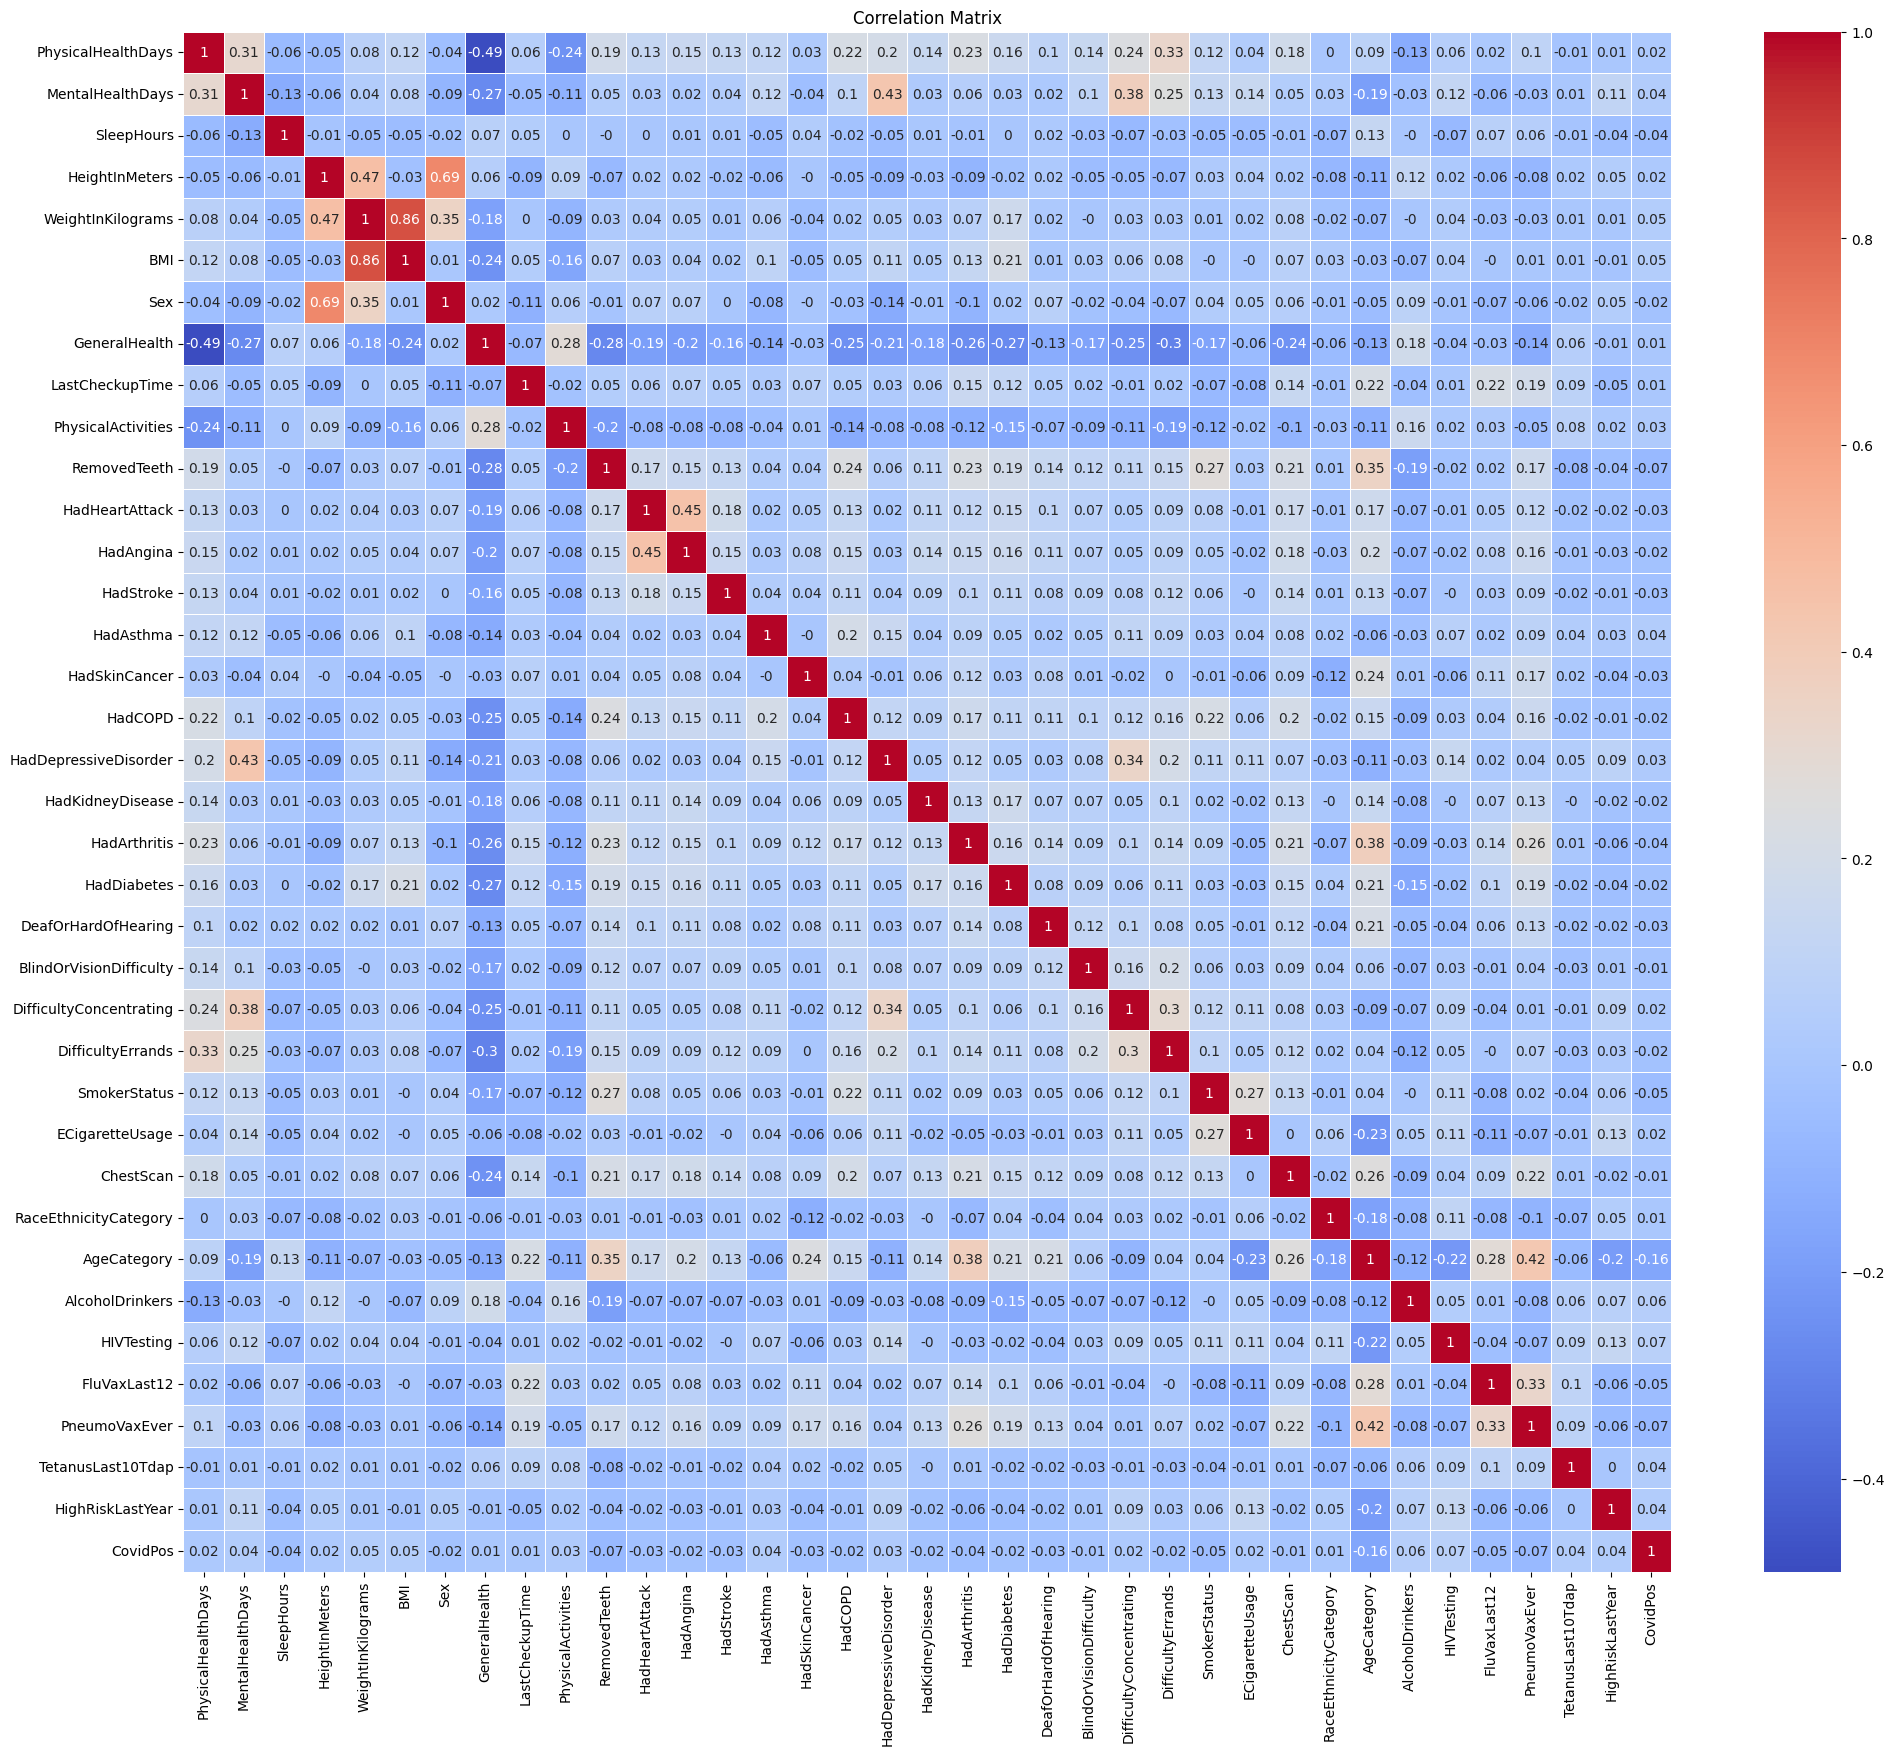

In [80]:
corr = encoded_data.corr().round(2)
plt.figure(figsize=(24, 20))
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()